### What is Exploratory Data Analysis?

We perform EDA in our data present in dataset, EDA is the process to investigate/explore data or dataset to find out the anamoly or the outliers, pattern, aspect of data.
While exploring the data we have to keep in mind tha our data should be clean and not contain any redundencies, null values or missing values, be have better understanding of data. Because if this is not the case there is a chance of not geeting good insights of data, we are not able to investigate the data with our best.

### Why we do or Perform EDA? or What is the need of EDA?

Our raw data is not good enough to use directly to solve our problem or to put in model building, maybe our data have noise, error, outliers, or the data will not be scaled properly. <br> The second thing we have to understand the data and here we required domain knowledge, suppose we work in medical science domain and after geeting the data for our problem our domain knowledge helps us to understand it (but don't worry, no one comes with knowledge in this earth, we all learn from experience, like once we done one prject in particular domain then that domain is understandable for us and we are easily work on that domain from next time, or if you want to be specific in any domain like finance/banking or medical science/medicare is good to go).

Note - EDA or Exploratory Data Analysis or Data Exploration are used interchangeably. (We use EDA in this session)

## So let's start with code

First we have to import required libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # May be this is not required, but let's see
import seaborn as sns

# Understanding of Dataset

We will load the dataset in df variable.

### Note - Dataset and notebook is present in GitHub.

In [19]:
df = pd.read_csv("D:\Learning_AIML\FuelConsumption.csv")
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [33]:
# Print top 5 rows of dataset (5 is default)
df.head() 

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [21]:
# Print bottom 5 rows of dataset (5 is default)
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [42]:
#Shape of dataset, our dataset contain 1067 data points or rows and 13 column where 12 is independent and 1 is dependent,
df.shape

(1067, 13)

In [45]:
# Column Names, here CO2EMISSIONS column is dependent of remaining column, means CO2EMISSION is the target/Y/T for our problem.
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [22]:
# Checking for data types of each column
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [32]:
# Number of unique values in each column
df.nunique()

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

In [60]:
# Unique values in particular column
df['TRANSMISSION'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

In [36]:
# One step solution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


NOTE - Most of the machine learning or deep learning algorithm accept input in numeric format, so as we see that our dataset contain object data type for 5 columns, named - MAKE, MODEL, ......
Before entering this data into our model, we have to change those values in numeric(float or integer) format or drop that column if not required.

This is not the part of EDA, so leave it now and move ahead, we will do thse things in Feature Selection.

In [68]:
# Descibe dataset, this gives us statistic summary
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [53]:
df.describe().shape

(8, 8)

NOTE - As we can see that descibe only works for numeric data and return 8 differnt types of values like no of count, mean, etc....it's helpful in understanding the data.

# Cleaning the dataset

In [61]:
# Checking for null values
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [87]:
# Drop Column Which is not required and store the dataset in new variable
final_df = df.drop(['MAKE','MODEL','VEHICLECLASS','MODELYEAR'], axis=1)
pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [88]:
final_df.shape

(1067, 9)

In [133]:
final_df.head()

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [89]:
final_df.CO2EMISSIONS.value_counts()

294    25
230    22
225    21
209    20
179    19
184    19
196    19
292    18
258    17
235    17
264    17
191    17
207    16
317    16
251    16
380    16
221    16
237    15
260    15
283    15
253    15
216    15
246    14
244    14
198    14
232    14
200    14
228    13
242    13
290    13
255    13
271    12
267    12
297    12
262    12
189    12
177    12
212    11
285    11
202    11
269    11
281    11
186    10
175    10
239    10
278    10
308    10
193    10
338     9
274     9
276     9
214     9
354     9
301     8
248     8
182     8
168     8
218     8
223     8
306     8
340     7
288     7
315     7
347     7
320     7
359     6
344     6
205     6
166     5
161     5
159     5
368     5
334     5
304     5
310     5
382     5
322     5
324     5
138     4
336     4
393     4
361     4
163     4
362     4
356     4
299     4
170     4
419     3
145     3
414     3
147     3
327     3
277     3
224     3
259     3
366     3
250     3
329     3
407     3
172     3


In [74]:
final_df.CO2EMISSIONS.unique()

array([196, 221, 136, 255, 244, 230, 232, 267, 212, 225, 239, 359, 338,
       354, 202, 214, 235, 251, 224, 258, 260, 227, 288, 361, 242, 246,
       304, 294, 336, 407, 409, 306, 308, 290, 262, 285, 281, 297, 292,
       209, 237, 356, 320, 380, 322, 437, 193, 200, 181, 228, 213, 191,
       317, 253, 370, 274, 324, 278, 283, 264, 250, 189, 218, 207, 248,
       382, 340, 377, 271, 269, 276, 179, 192, 177, 163, 259, 272, 347,
       366, 334, 344, 362, 414, 432, 411, 419, 435, 413, 229, 184, 270,
       299, 277, 329, 173, 182, 172, 159, 186, 222, 301, 198, 195, 168,
       331, 166, 156, 138, 373, 350, 396, 360, 386, 368, 488, 421, 216,
       346, 254, 402, 315, 343, 318, 175, 152, 161, 205, 165, 170, 162,
       126, 110, 145, 265, 143, 345, 280, 310, 363, 223, 400, 342, 129,
       352, 194, 256, 327, 147, 398, 313, 286, 275, 393, 389, 131, 108,
       384, 197, 124], dtype=int64)

In [116]:
final_df.dtypes

ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [132]:
final_df.ENGINESIZE.unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2, 6. ,
       6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 1.8, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4])

In [91]:
final_df.FUELTYPE.unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

In [97]:
final_df.TRANSMISSION.nunique()

22

In [94]:
final_df.TRANSMISSION.value_counts()

A6     222
AS6    189
M6     141
A8      87
AS8     80
AS7     76
M5      48
AV      46
A4      45
AM7     34
A5      30
A7      12
AV6     11
AS5     10
M7       9
A9       8
AM6      6
AV7      5
AV8      3
AM5      2
AS9      2
AS4      1
Name: TRANSMISSION, dtype: int64

In [140]:
final_df.CYLINDERS.value_counts()

4     420
6     356
8     252
12     17
10      9
5       9
3       4
Name: CYLINDERS, dtype: int64

<AxesSubplot:>

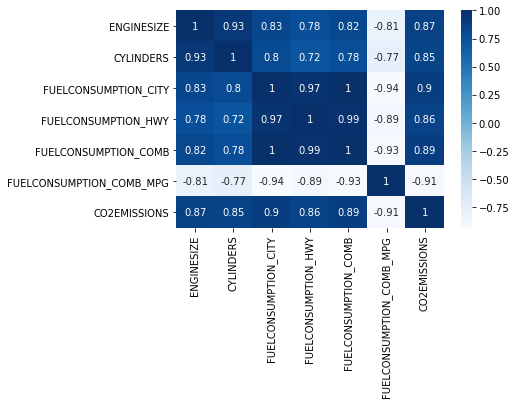

In [98]:
# Check for relationship or corelation
plt.figure(figsize=(6,4))
sns.heatmap(final_df.corr(),cmap='Blues',annot=True)

<AxesSubplot:xlabel='ENGINESIZE'>

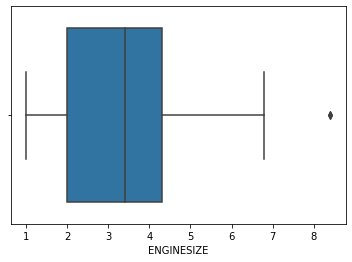

In [131]:
# import seaborn as sns
sns.boxplot(x=final_df['ENGINESIZE']) # Check for all except object column

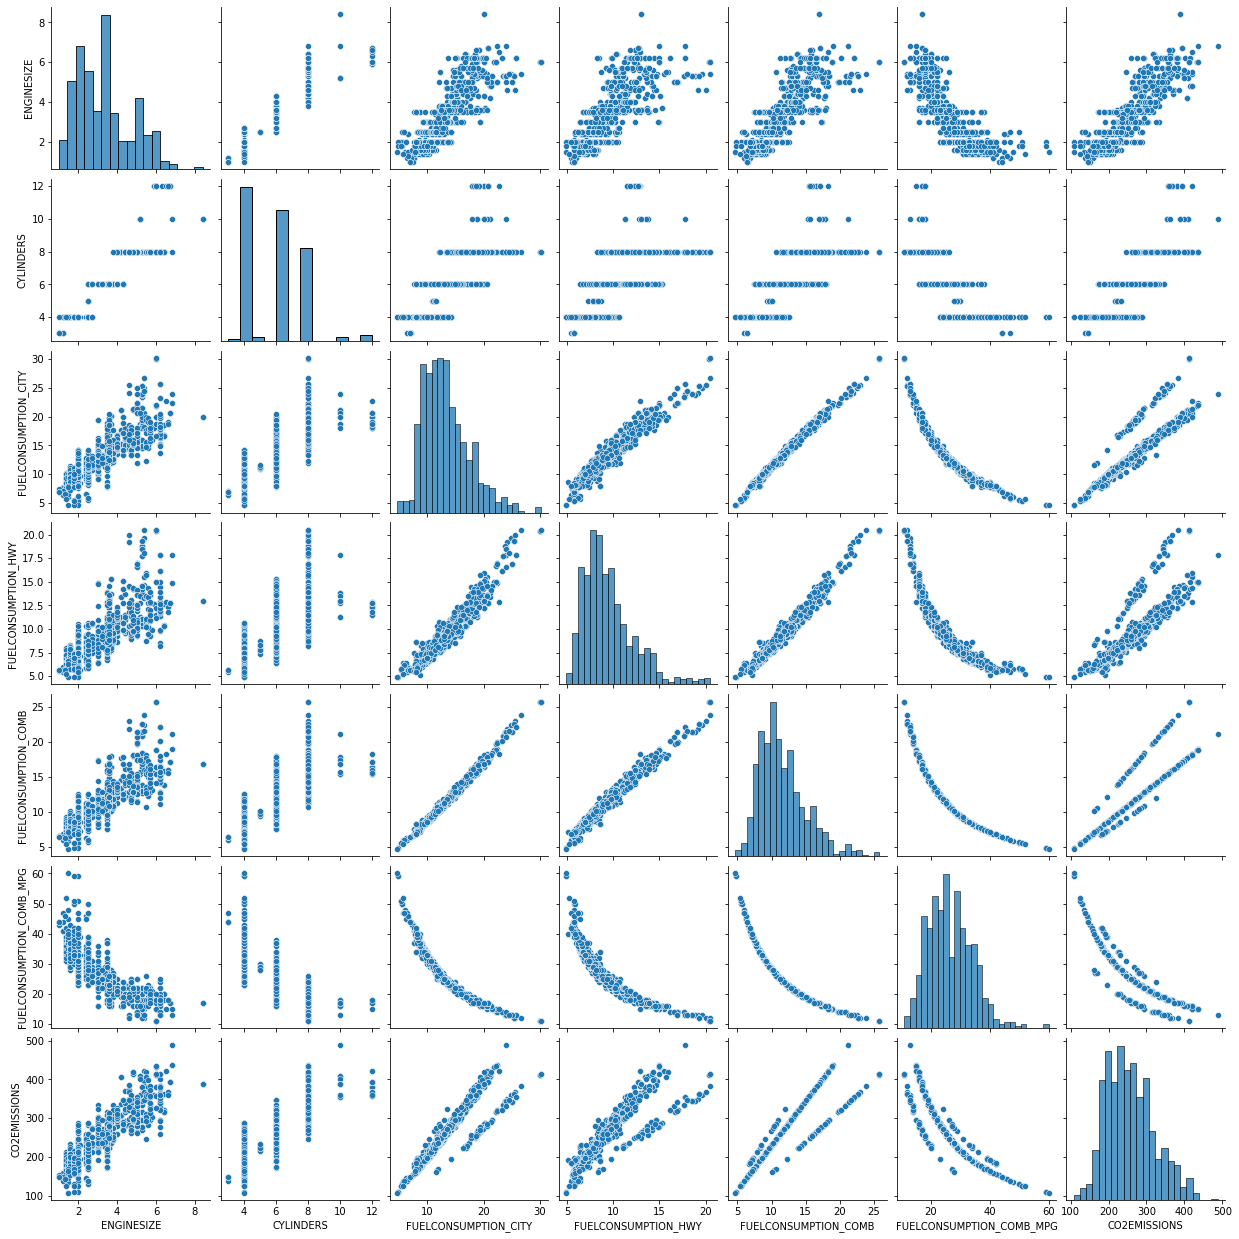

In [128]:
sns.pairplot(final_df)

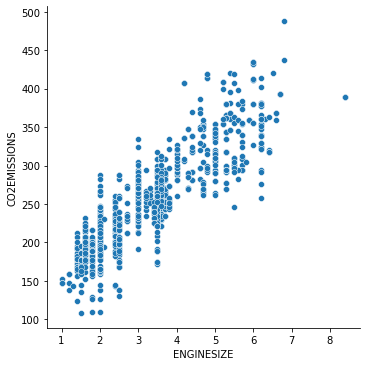

In [136]:
sns.relplot(x = 'ENGINESIZE', y = 'CO2EMISSIONS', data=final_df)

#### What we found here that engine size is linearly correlated to CO2EMISSION, So we will consider ENGINESIZE as one of the important feature at the time of feature selection

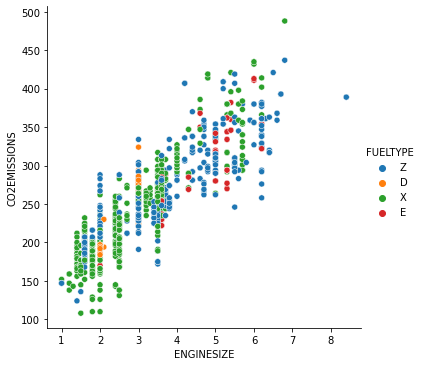

In [137]:
sns.relplot(x = 'ENGINESIZE', y = 'CO2EMISSIONS',hue ='FUELTYPE', data=final_df)

Now we see that fuel X is not performing well compared to others.

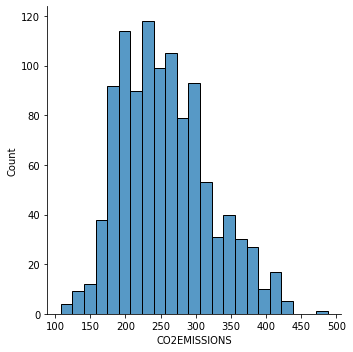

In [146]:
# sns.relplot(x = 'CYLINDERS', y = 'ENGINESIZE', data=final_df)
sns.displot(final_df['CO2EMISSIONS'])

### As deep you go, as dirty you become........but for better understanding you have to be dirty

THANK YOU, For more update please subscribe the channel.....Any doubt, comment below